# Кластеризация на практике (дополнение к ЛР 6) + задания для МО-211

Импортируем библиотеки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Создание датасетов с помощью make_blobs

Создаем датасет из 200 точек, в 2-мерном пространстве, будет 3 кластера

In [ ]:
data = make_blobs(n_samples=200, n_features=2, centers=3)

In [ ]:
data[0][:,0]

array([-3.08929401, -3.68330112, -4.88930939,  0.7928482 , -0.93318415,
       -2.98429575, -2.95324226, -4.62729443, -0.59632762, -4.00523074,
       -4.20739818,  0.81940783,  0.48675872, -4.8518715 , -1.10332427,
       -3.68112729, -4.75297098, -4.93869827, -5.18259458, -4.48733731,
       -3.60593379, -4.17780214, -5.94429619,  0.1547725 , -5.22207415,
       -4.64134453, -2.75311579, -4.96304669, -6.20140658, -5.11604693,
        1.6623446 , -4.62756891, -3.98882378,  0.6527288 ,  0.32164195,
        0.8771521 , -4.89027315, -3.39467568, -4.75091773, -3.1611559 ,
        0.50276687, -2.64235724, -3.37186398, -3.42169493, -5.05356   ,
       -5.34676514, -3.5824727 , -3.76636545,  0.47662903, -4.77913134,
       -4.04846599,  1.08099318,  0.48457319, -5.29213796, -4.5015773 ,
        1.22740709, -3.39195027, -4.54307285, -4.28574411, -1.08547081,
        1.14426505,  0.6942203 , -3.9347184 ,  1.35620095, -5.35861922,
       -2.34347671,  0.5888507 , -5.62198927,  0.12206122, -4.08

Отображаем точки на плоскости

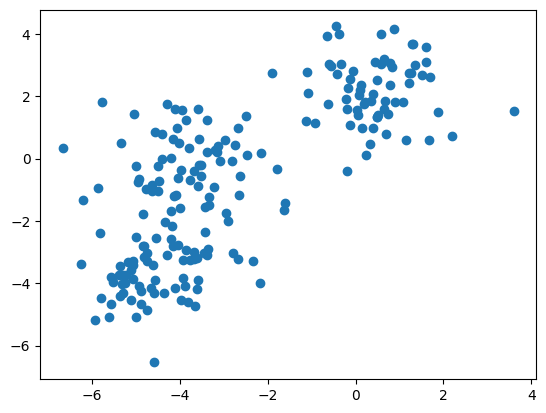

In [ ]:
plt.scatter(data[0][:,0], data[0][:,1])

## KMeans

KMeans - классический и наиболее простой алгоритм кластеризации

### Идея метода

0. Случайно выставляем точки в N-мерном пространстве в допустимой области, где `N` - число признаков в данных. Число признаков можно найти как `df.shape[1]`. Данные точки будут центрами кластеров (<b>центроидами</b>) `0..N-1`. Присваиваем число итераций, равное нулю `n_iter = 0`.
1. Кластеризуем точки. На данном шаге вычисляются все попарные расстояния между центрами кластеров `center` и точками `P` в датасете. Функция расстояния - Евклидова (корень из суммы квадратов) $\sqrt{\sum_{i=1}^N{(center_i-P_i)^2}}$. Для каждой точки в датасете присваивается номер кластера, к которому она принадлежит - класс ближайшей из точек `center`.
2. Если на данном этапе количество итераций больше либо равно максимальному числу итераций `n_iter >= max_iter`, возвращаем результат кластеризации (то есть наши предсказания классов), иначе повышаем `n_iter += 1`.
3. Пересчитываем центры кластеров. Для каждой координаты высчитываем взвешенную сумму координат тех точек, которые попали в данный кластер. **НЕ нужно пользоваться евклидовой метрикой на данном шаге.** Мы берем среднее для каждой из координат среди всех тех точек, которые попали в кластер `i`: $center_i = mean(P\in i)$. Если для всех центров кластеров их координаты изменились незначительно, прерываем вычисления (алгоритм сошелся), возвращаем результат. Иначе переходим к шагу 1.

Выше описан вариант алгоритма, когда изначальные координаты центроидов определяются полностью случайным образом. На практике чаще используется вариант [kmeans++](https://ru.wikipedia.org/wiki/K-means%2B%2B), когда начальные координаты центроидов определяются специальным образом

In [ ]:
from sklearn.cluster import KMeans

Обучаем модель

In [ ]:
kmeans = KMeans(3, n_init='auto').fit(data[0])

Получаем координаты центроидов

In [ ]:
kmeans.cluster_centers_

array([[-4.5157454 , -3.6377341 ],
       [-3.81197557, -0.15107547],
       [ 0.4251607 ,  2.18437108]])

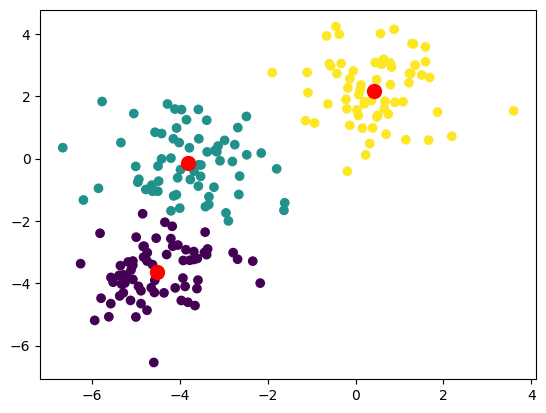

In [ ]:
# отрисовываем на плоскости точки, цветом обозначаем кластер
plt.scatter(data[0][:,0], data[0][:,1], c=kmeans.labels_)
# отрисовываем центроиды
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

Может посмотреть предсказания - какой кластер получился для каждой точки (нумерацию кластеров можно уточнить зная координаты центроидов)

In [ ]:
kmeans.labels_

array([1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 0, 0,
       0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 0, 2, 2, 0, 1, 2, 1, 0, 1, 2, 2, 2, 0, 2, 0, 0,
       2, 0, 2, 1, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 0, 2, 2,
       2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2,
       1, 1, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 2, 0, 1, 2,
       2, 2, 2, 1, 1, 2, 2, 0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 0, 0, 0, 2, 1,
       2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0,
       0, 1], dtype=int32)

## Подбор оптимального количества кластеров

Можно определить сумму квадратов расстояний для всех точек до ближайших к ним центроидов

In [ ]:
kmeans.inertia_

357.0530702909512

Известно и очевидно, что с увеличением количества кластеров эта сумма будет уменьшаться, однако в определенный момент (оптимальное количество кластеров), она начнет уменьшаться слишком медлено

In [ ]:
inertias = []

for i in range(2, 11):
  km = KMeans(i, n_init='auto').fit(data[0])
  inertias.append(km.inertia_)

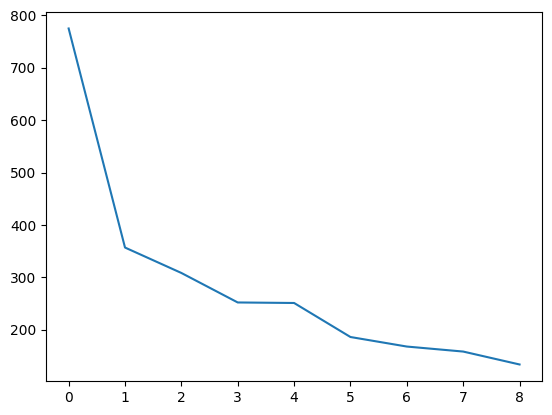

In [ ]:
plt.plot(inertias)

На оси x 0 это 2, 1 = 3 и т д

Можно сказать, что оптимальным количеством кластеров может быть 2 или 3. При обучении с учителем у нас нет строгих метрик - в большинстве случаев качество решения мы определяем сами.

На графике выше видно, что, например, после точки с x = 1 (3 кластера) значение нашей суммы начинает уменьшаться с меньшей скоростью. Такие точки называют локтевыми, а метод подбора оптимального количества кластеров таким образом - методом локтя (elbow method)

Справедливо заметить, что такая метрика существует только тогда, когда у нас есть центроиды. Но не все алгоритмы кластеризации предполагают поиск оптимального расположения центроидов (как мы увидим далее). В этом случае следует запомнить, что в задаче кластеризации обычно используют следующие виды метрик:
- внешние (когда мы решаем задачу кластеризации на наборе данных, размеченном для классификации - мы знаем правильные ответы и можем сравнить их с результатами кластеризации, то есть сравнить метки классов с метками кластеров);
- внутренние (когда мы не знаем правильных ответов)

С внешними метриками нет смысла сейчас работать - наш датасет не размечен для классификации, мы просто сгенерировали множество точек. Поэтому поработаем с внутренними, а конкретно с наиболее часто используемой - коэффициентом силуета (silhouette score)

Значение метрики находится в диапазоне [-1, 1]. Значения > 0 обычно считаются хорошими

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(data[0], kmeans.labels_)

0.5701436380674088

In [ ]:
ss = []

for i in range(2, 11):
  ss.append(silhouette_score(data[0], KMeans(i, n_init='auto').fit(data[0]).labels_))

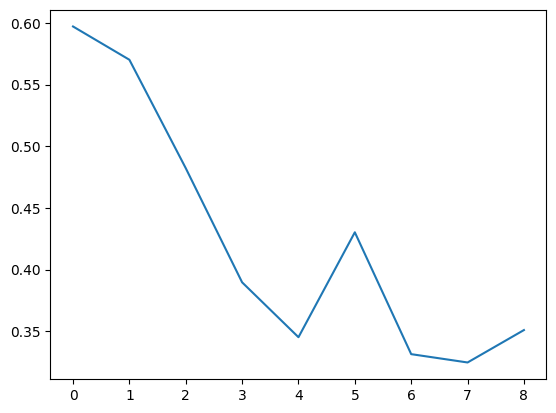

In [ ]:
plt.plot(ss)

По значению коэффициента силуета мы также можем определить оптимальные варианты для количества кластеров, главное помнить что формально чем выше значение этой метрики - тем лучше

## Гаусовы смеси

Другой моделью для кластеризации являются гауссовые смеси, идея которых в том, что кластер для точки будет определяться не по расстоянию до центроида, а по вероятности (для каждой точки мы будем знать вероятности ее принадлежности к каждому из кластеров - выбираем кластер, соответствующий максимальной вероятности)

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm = GaussianMixture(n_components=3).fit(data[0])

Координаты центроидов

In [ ]:
gm.means_

array([[ 0.42788144,  2.18573837],
       [-3.83391787, -0.21063162],
       [-4.50011453, -3.64386553]])

Обратите внимание, что здесь не labels_, а predict

In [ ]:
gm.predict(data[0])

array([1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       2, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0, 0, 0, 2, 0, 2, 2,
       0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0,
       0, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 0, 1, 2, 0,
       1, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 0, 1,
       0, 0, 1, 0, 2, 0, 1, 1, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2,
       2, 1])

Визуализируем

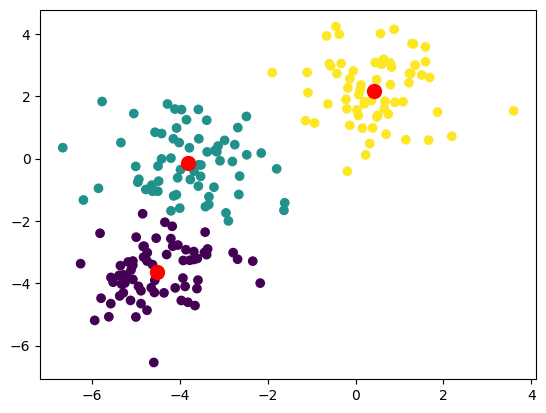

In [ ]:
plt.scatter(data[0][:,0], data[0][:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

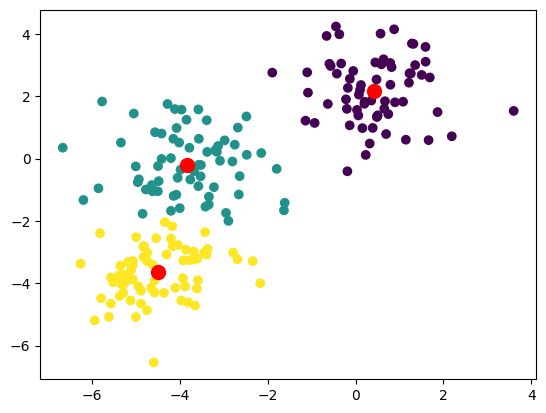

In [ ]:
plt.scatter(data[0][:,0], data[0][:,1], c=gm.predict(data[0]))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

Можно подобрать оптимальное количество кластеров с помощью коэффициента силуета

In [ ]:
ss = []

for i in range(2, 11):
  ss.append(silhouette_score(data[0], GaussianMixture(n_components=i).fit(data[0]).predict(data[0])))

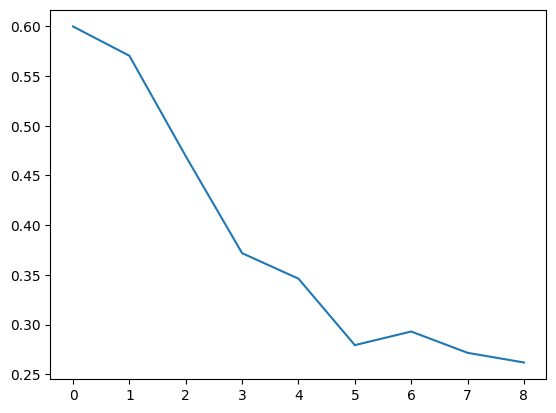

In [ ]:
plt.plot(ss)

## DBSCAN

DBSCAN (Density-based spatial clustering of applications with noise) - это наиболее часто используемый в настоящее время алгоритм кластеризации (вернее сказать, что это база, поскаольку наиболее часто на практике испольхуются его модификации)

Данный алгоритм предполагает, что часть точек из набора данных не принадлежат ни одному из кластеров, а являются шумом. В то же время никаких центроидов нет - кластеры формируются на основе близости. Оригинальный алгоритм неплохо описан в [Википедии](https://ru.wikipedia.org/wiki/DBSCAN#%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN().fit(data[0])

In [ ]:
dbscan.labels_

array([ 0,  1,  1,  2, -1,  0, -1,  1,  3,  0,  0,  2,  3, -1, -1,  0,  1,
        0,  1,  0,  1,  0, -1,  3,  1,  0,  0,  0, -1,  1, -1,  0,  0,  3,
       -1, -1,  1,  1,  1,  0,  3,  0,  1,  0, -1, -1,  0,  0,  3,  0,  1,
        3,  3,  1,  0,  2,  0,  1,  0, -1, -1,  3,  1,  2,  1, -1,  2,  1,
        3,  0,  3,  2,  0,  3,  3,  1,  1,  1,  0,  0,  0, -1,  0,  0,  2,
        1,  3,  3,  3,  0, -1, -1, -1,  0,  1,  1,  0,  1,  1,  1, -1,  3,
        1,  1, -1,  0,  2, -1,  1,  2, -1,  0, -1,  1,  3,  3,  1,  1,  1,
        0,  0,  0,  3,  2, -1, -1,  1,  1,  3,  3,  1,  0,  3, -1,  0, -1,
        1,  3, -1,  1,  1,  2,  3, -1,  1,  1, -1,  0,  0, -1,  3,  1, -1,
       -1, -1, -1,  3, -1,  0,  3,  3,  1, -1,  1,  0,  2,  0,  3, -1,  1,
        0, -1,  1, -1, -1, -1,  3, -1,  0,  2,  0, -1, -1,  0,  1,  3,  1,
        0,  1,  1, -1,  1,  1,  1,  1,  0, -1,  1,  1,  0])

In [ ]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3])

Метка -1 - это точки, которые помечены как шум

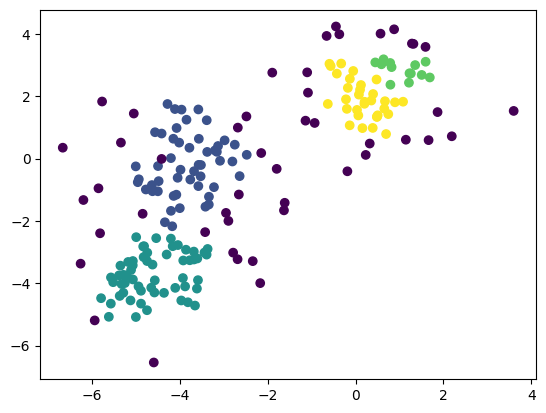

In [ ]:
plt.scatter(data[0][:,0], data[0][:,1], c=dbscan.labels_)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12]


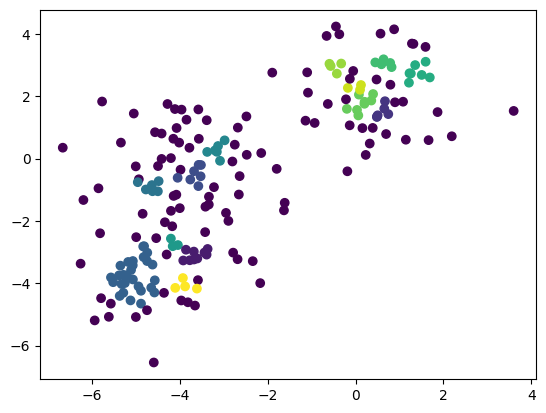

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=4).fit(data[0])
print(np.unique(dbscan.labels_))
plt.scatter(data[0][:,0], data[0][:,1], c=dbscan.labels_)

Основными параметрами алгоритма являются эпсилон и минимальное количество точек в окрестности (с радиусом эпсилон). Эти параметры обычно подбираются исследователем индивидуально для каждой задачи, однако существуют общие рекомендации к подбору данных параметров

Минимальное количество точек в окрестности часто берут как 2 * размерность (в нашем случае - 4)

Далее для каждой точки считают расстояния до k ближайших соседей (k в данном случае равно 4), считая за первого соседа саму точку (иногда не считают саму точку за первого соседа - как захочет исследователь). Полученные значения усредняют

Усредненные значения сортируют по возрастанию и отображают на графике. Знакомая вам локтевая точка (она определяется исследователем по виду графика) может указать на значение эпсилон (это будет координата y)

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
nbrs = NearestNeighbors(n_neighbors=4).fit(data[0])
distances, indices = nbrs.kneighbors(data[0])
distances

array([[0.        , 0.28300592, 0.29660383, 0.35323539],
       [0.        , 0.08398362, 0.0975539 , 0.2459241 ],
       [0.        , 0.25128345, 0.26048658, 0.41274995],
       [0.        , 0.35787742, 0.42717967, 0.49507876],
       [0.        , 0.22106785, 0.67968433, 0.80187118],
       [0.        , 0.23529438, 0.26964407, 0.38969735],
       [0.        , 0.26281626, 0.47420145, 0.50858519],
       [0.        , 0.16822885, 0.31455773, 0.39957462],
       [0.        , 0.0766722 , 0.26794078, 0.35779434],
       [0.        , 0.21944608, 0.41700702, 0.4396487 ],
       [0.        , 0.2145422 , 0.38902309, 0.43114947],
       [0.        , 0.13622975, 0.2477071 , 0.31074061],
       [0.        , 0.00484978, 0.04854939, 0.27115026],
       [0.        , 0.5753502 , 0.65168353, 0.75713507],
       [0.        , 0.57194365, 0.57651813, 0.65209174],
       [0.        , 0.22215468, 0.22902032, 0.25337885],
       [0.        , 0.25128345, 0.33408049, 0.48974646],
       [0.        , 0.09641137,

In [ ]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
distances

array([0.08113736, 0.08320339, 0.08664001, 0.10106321, 0.10146104,
       0.1068654 , 0.10705611, 0.10891872, 0.11041773, 0.11566138,
       0.11570093, 0.1180828 , 0.11840168, 0.12054652, 0.12172134,
       0.12508154, 0.12761894, 0.12801343, 0.13087014, 0.1311073 ,
       0.13315649, 0.13602798, 0.13977066, 0.14146805, 0.14245343,
       0.14338297, 0.14529369, 0.14535947, 0.14612062, 0.14620374,
       0.14707062, 0.14863005, 0.14876131, 0.1489183 , 0.15140136,
       0.15192283, 0.15288471, 0.15455972, 0.15573618, 0.15980371,
       0.16104966, 0.1610507 , 0.16270547, 0.16297026, 0.16700426,
       0.16715871, 0.16729925, 0.16803927, 0.16804824, 0.16872517,
       0.17366937, 0.17449916, 0.17508034, 0.17526837, 0.17560183,
       0.17613846, 0.17672693, 0.17688627, 0.178305  , 0.17907384,
       0.17923018, 0.18079143, 0.18228005, 0.18323531, 0.18365202,
       0.1837422 , 0.18416261, 0.18703184, 0.19336273, 0.19463284,
       0.19508922, 0.19561025, 0.19950609, 0.20291103, 0.20444

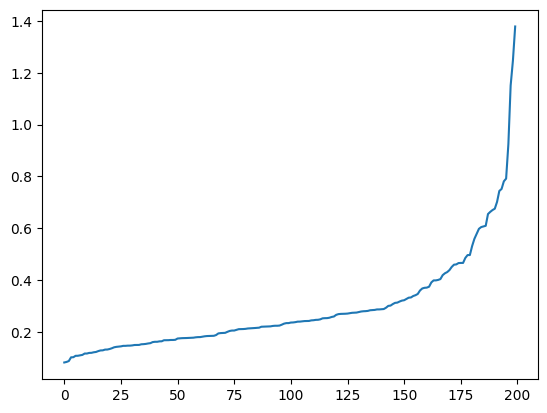

In [ ]:
plt.plot(distances)

Видим, что локоть находится где-то в районе 0.6 - 0.8. Попробуем выбрать 0.8 в качестве эпсилона

[-1  0  1]


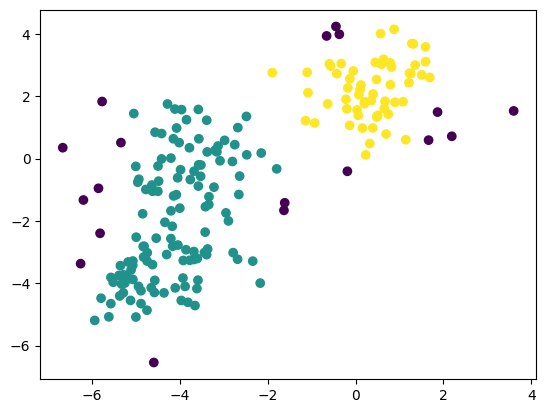

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=4).fit(data[0])
print(np.unique(dbscan.labels_))
plt.scatter(data[0][:,0], data[0][:,1], c=dbscan.labels_)

Получилось вполне неплохо, можем еще и коэффициент силуета посчитать

In [ ]:
silhouette_score(data[0], dbscan.labels_)

0.43876051170826197

Если на демонстрационном экзамене вам надо будет решить задачу кластеризации, используйте не менее 3 алгоритмов! Можете использовать те, которые прописаны в данном ноутбуке.

## Задания ЛР 6 для МО-211

1. Сформировать 3 различных датасета для кластеризации с помощью функции make_blobs (количество кластеров должно быть различным, размерность всех датасетов должна быть 2 - чтобы можно было визуализировать).
2. Для каждого датасета:
- визуализировать датасет
- выполнить кластеризацию с помощью алгоритма KMeans
- визуализировать центроид + цветом обозначить принадлежность точки кластеру
- подобрать оптимальное количество кластеров по значению суммы квадратов расстояний до центроидов
- подобрать оптимальное количество кластеров по значению коэффициента силуета
- выполнить кластеризацию с помощью DBSCAN тремя способами (самостоятельно задать или подобрать 3 пары параметров для этого алгоритма)
3. Самостоятельно реализовать KMeans с возможностью подсчета суммы квадратов расстояний до центроидов.
4. Провести кластеризацию всех датасетов с использованием собственной реализации Kmeans.

## Дополнительное задание ЛР6 для МО-211

Реализовать базовый вариант алгоритма DBScan и провести кластеризацию всех датасетов с его помощью.